In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from tensorflow.keras.utils import to_categorical 
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [55]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

In [56]:
history = model.fit(partial_x_train,
                           partial_y_train,
                           epochs=10,
                           batch_size=512,
                           validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 3s 136ms/step - loss: 2.7395 - accuracy: 0.5998 - val_loss: 1.9440 - val_accuracy: 0.6700
Epoch 2/10
16/16 [==============================] - 2s 115ms/step - loss: 1.5501 - accuracy: 0.7291 - val_loss: 1.4080 - val_accuracy: 0.7070
Epoch 3/10
16/16 [==============================] - 1s 64ms/step - loss: 1.1015 - accuracy: 0.7851 - val_loss: 1.1592 - val_accuracy: 0.7600
Epoch 4/10
16/16 [==============================] - 1s 58ms/step - loss: 0.8454 - accuracy: 0.8310 - val_loss: 1.0333 - val_accuracy: 0.7980
Epoch 5/10
16/16 [==============================] - 1s 64ms/step - loss: 0.6734 - accuracy: 0.8700 - val_loss: 0.9433 - val_accuracy: 0.8050
Epoch 6/10
16/16 [==============================] - 1s 62ms/step - loss: 0.5491 - accuracy: 0.8944 - val_loss: 0.9049 - val_accuracy: 0.8180
Epoch 7/10
16/16 [==============================] - 1s 60ms/step - loss: 0.4532 - accuracy: 0.9108 - val_loss: 0.8658 - val_accuracy: 0.8230
Epoch 8/10


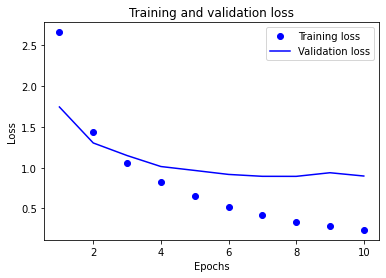

In [45]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

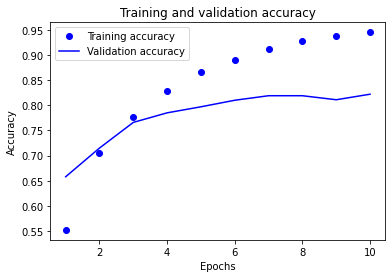

In [46]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 0.9713 - accuracy: 0.8005


[0.9713060855865479, 0.8005343079566956]

In [48]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy) 
hits_array.mean()

0.19768477292965272